In [ ]:
#loading Libraries  and dataset

In [1]:
library(optimbase)
library(fastDummies)
library(ISLR)
fix(Auto)
attach(Auto)

Loading required package: Matrix


In [ ]:
# Task 1, creating a function for NLL based Gradient Descent

In [37]:
gradientDescent<- function(X,y, weights,learning_rate, epoch){
    m<- length(y)
    
    for (iter in 1:epoch){
        sigma <- X %*% weights
        sigmoid <- 1/(1+exp(-sigma))
        error<- sigmoid-y
        weights<- weights-(learning_rate/m)*(t(X)%*%error)
        #if I use the below 2 lines instead of the one above, the function changes from NLL to MSE
        #sigmoid_de<- sigmoid*(1-sigmoid)
        #weights<- weights+2*((learning_rate/m)*(t(X)%*%(error*sigmoid_de)))
        
    }
    return(weights)
}

In [ ]:
#Task 2, Creating Input and Output variables, normalising and dummy variable creation

In [4]:
high<- (mpg>=25)
y<-zeros(length(high),1)
y[high]<-1

In [5]:
results <- dummy_cols(origin, remove_first_dummy = TRUE)
dataset<-data.frame(horsepower,weight,year)
standardised.data<- scale(dataset[,1:3])
X<- cbind(ones(nrow(y),1),standardised.data,results[,2],results[,3])

In [ ]:
#Defining Important Parameter Values, and testing the Gradient descent on the whole training set

In [40]:
weights<- zeros(ncol(X),1)
epoch <- 10000
learning_rate <- 0.05

In [35]:
weights<-runif(ncol(X), min=-0.7, max=0.7)

In [41]:
weights<-gradientDescent(X,y,weights,learning_rate,epoch)

In [42]:
weights

,-2.6041703
horsepower,-1.4361006
weight,-4.0315939
year,1.7480174
,1.1856663
,0.1395751


In [20]:
weights

,-1.12944156
horsepower,-0.75595791
weight,-2.14877549
year,0.95047474
,0.20151481
,-0.07429174


In [ ]:
#calculating prediction error on the training set and all misclassificatios

In [45]:
m<- length(y)
h_x<- X%*%weights
predict <- 1/(1+exp(-h_x))
probs<- (predict>0.5)
y_pred<-zeros(m,1)
y_pred[probs]<-1
print(((1/m)*sum((y-y_pred)^2))^0.5)
print(sum(y_pred!= y))

[1] 0.2988072
[1] 35


In [ ]:
#Task 3: Splitting the data into Training set and Test set (a split in half)

In [44]:
size <- floor(0.5 * nrow(X))
set.seed(2810)
train_ind <- sample(seq_len(nrow(X)), size = size)
X_train <- X[train_ind, ]
X_test <- X[-train_ind, ]
y_train <- y[train_ind ]
y_test <- y[-train_ind]

In [ ]:
#Task 4: Running the algorithm and calculating calculating MSE on Test Set 

In [232]:
initial_weights<-runif(ncol(X), min=-0.7, max=0.7)

In [233]:
epoch <- 2000
learning_rate <- 0.3

In [234]:
weights<-gradientDescent(X_train,y_train,initial_weights,learning_rate,epoch)

In [235]:
h_x<- X_train%*%weights
predict <- 1/(1+exp(-h_x))
probs<- (predict>0.5)
y_pred<-zeros(length(y_train),1)
y_pred[probs]<-1
m<- length(y_train)
print(((1/m)*sum((y_train-y_pred)^2))^0.5)
print(sum(y_pred!= y_train))

[1] 0.3273268
[1] 21


In [236]:
h_x<- X_test%*%weights
predict <- 1/(1+exp(-h_x))
probs<- (predict>0.5)
y_pred<-zeros(length(y_test),1)
y_pred[probs]<-1
m<- length(y_test)
print(((1/m)*sum((y_test-y_pred)^2))^0.5)
sum(y_pred!= y_test)

[1] 0.3113499


[1] 19

In [208]:
weights

,-1.8580643
horsepower,-1.4308870
weight,-3.5985392
year,1.6191479
,0.7884743
,0.3616122


In [209]:
weights

,-1.8580643
horsepower,-1.4308870
weight,-3.5985392
year,1.6191479
,0.7884743
,0.3616122


In [ ]:
#Task 6:Running Gradient Descent 100 times with different weight initialisation, and Creating Box plot for it

In [210]:
m<- length(y_test)
diff_error<- zeros(100,1)
for (i in 1:100){
    weights<-runif(ncol(X), min=-0.7, max=0.7)
    weights<-gradientDescent(X_train,y_train,weights,learning_rate,epoch)
    h_x<- X_test%*%weights
    predict <- 1/(1+exp(-h_x))
    probs<- (predict>0.5)
    y_pred<-zeros(length(y_test),1)
    y_pred[probs]<-1
    diff_error[i]<-((1/m)*sum((y_test-y_pred)^2))^0.5
}

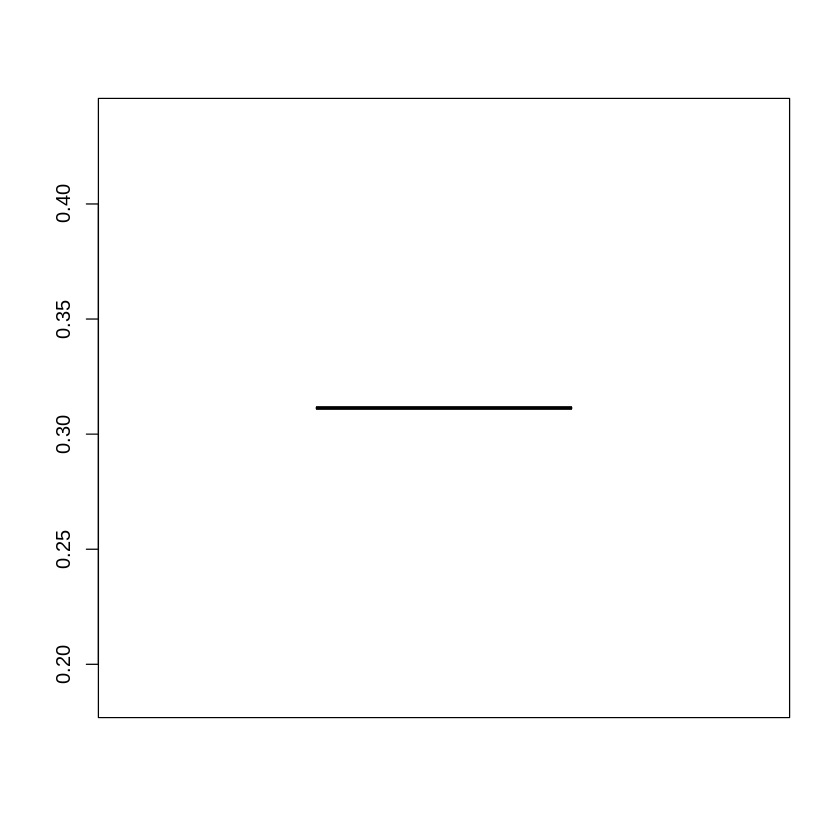

In [211]:
boxplot(diff_error)

In [ ]:
#(Optional)Task 7:Running the Gradient Algorithm 4 times with different weights and choosing the prediction rule with the best MSE

In [ ]:
h_x<- X_train%*%weights
predict <- 1/(1+exp(-h_x))
probs<- (predict>0.5)
y_pred<-zeros(length(y_train),1)
y_pred[probs]<-1
m<- length(y_train)
print(((1/m)*sum((y_train-y_pred)^2))^0.5)
print(sum(y_pred!= y_train))

In [239]:
m<- length(y_train)
diff_error<- zeros(4,1)
diff_weights <-zeros(ncol(X_train),4)
#learning_rate<-0.3; They were already set
#epoch<-2000 ; They were already set
for (i in 1:4){
    weights<-runif(ncol(X_train), min=-0.7, max=0.7)
    diff_weights[,i]<-gradientDescent(X_train,y_train,weights,learning_rate,epoch)
    h_x<- X_train%*%diff_weights[,i]
    predict <- 1/(1+exp(-h_x))
    probs<- (predict>0.5)
    y_pred<-zeros(length(y_train),1)
    y_pred[probs]<-1
    diff_error[i]<-((1/m)*sum((y_train-y_pred)^2))^0.5
}

In [240]:
diff_error

0.3273268
0.3273268
0.3273268
0.3273268


In [241]:
diff_weights

-1.8591098,-1.8597288,-1.8580603,-1.8628514
-1.4674338,-1.4422740,-1.4428050,-1.4471293
-3.5641617,-3.5879352,-3.5866813,-3.5850146
1.6099637,1.6167663,1.6159335,1.6168322
0.7797622,0.7883123,0.7853562,0.7919861
0.3747738,0.3681478,0.3659088,0.3738828


In [242]:
best_weights<- diff_weights[,which.min(diff_error)]

In [243]:
best_weights

[1] -1.8591098 -1.4674338 -3.5641617  1.6099637  0.7797622  0.3747738

In [ ]:
#Testing Misclassifications and test error on our test set

In [265]:
h_x<- X_test%*%best_weights
predict <- 1/(1+exp(-h_x))
probs<- (predict>0.5)
y_pred<-zeros(length(y_test),1)
y_pred[probs]<-1
m<- length(y_test)
print(((1/m)*sum((y_test-y_pred)^2))^0.5)
print(sum(y_pred!= y_test))

[1] 0.3113499
[1] 19


In [ ]:
#(Optional) Task 5: Trying different stopping rule- Stopping the algorithm if the reduction in Loss Function is less than a chosen
#but small value

In [261]:
gradientDescent_new<- function(X,y, weights,learning_rate, epoch){
    m<- length(y)

    J_history<- zeros(epoch,1)
    
    for (iter in 1:epoch){
        sigma = X %*% weights
        sigmoid = 1/(1+exp(-sigma))
        sigmoid_de<- sigmoid*(1-sigmoid)
        error<- y-sigmoid
        weights<- weights+2*((learning_rate/m)*(t(X)%*%(error*sigmoid_de)))
        J_history[iter]<-CostFunction(X,y,weights)
        if (iter>1 &&( J_history[iter-1]-J_history[iter]<0.00001)){
        break
        }
        
    }
    print(iter)
    return(weights)
}

In [258]:
CostFunction<- function(X , y,weights){
    m <- length(y)
    J<-0
    grad<-zeros(length(weights),1)
    z<-(X%*%weights)
    sigmoid <- 1/(1+exp(-z))
    J<- (1/m)*sum((-y*log(sigmoid))-((1-y)*log(1-sigmoid)))
    return(J)
}

In [262]:
weights<-gradientDescent_new(X_train,y_train,initial_weights,learning_rate,epoch)
h_x<- X_train%*%weights
predict <- 1/(1+exp(-h_x))
probs<- (predict>0.5)
y_pred<-zeros(length(y_train),1)
y_pred[probs]<-1
m<- length(y_train)
print(((1/m)*sum((y_train-y_pred)^2))^0.5)
print(sum(y_pred!= y_train))

[1] 1094
[1] 0.3273268
[1] 21


In [264]:
h_x<- X_test%*%weights
predict <- 1/(1+exp(-h_x))
probs<- (predict>0.5)
y_pred<-zeros(length(y_test),1)
y_pred[probs]<-1
m<- length(y_test)
print(((1/m)*sum((y_test-y_pred)^2))^0.5)
print(sum(y_pred!= y_test))

[1] 0.3350297
[1] 22
